<a href="https://colab.research.google.com/github/DAWUNHAN/deeplearning-fundamental/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [1]:
from tensorflow.keras.datasets import cifar10

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

170508288/170498071 [==============================] - 6s 0us/step
train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [3]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [4]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### CIFAR10 데이터 시각화
* 이미지 크기는 32x32이며 RGB채널. 
* 전반적으로 Label에 해당하는 대상이 이미지의 중앙에 있고, Label 대상 오브젝트 위주로 이미지가 구성. 

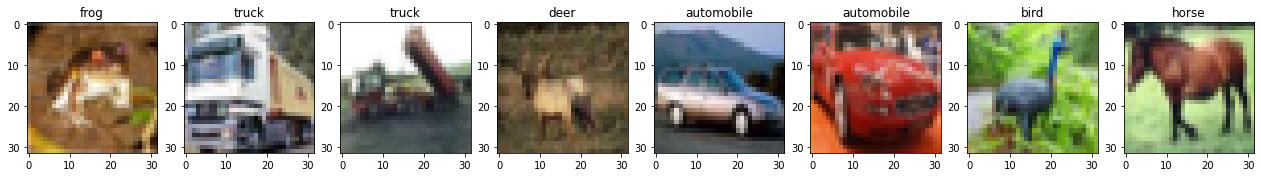

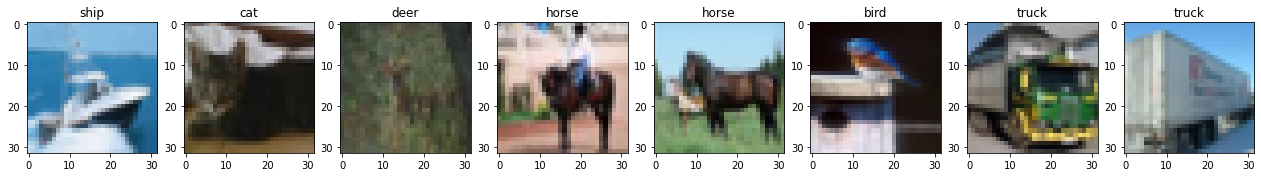

In [5]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### Data preprocessing
* image array의 0 ~ 255 사이의 값으로 되어 있는 pixel intensity 값을 0 ~ 1 사이 값으로 변환. 정수값 pixel 값을 255.0 으로 나눔. 
* label array는 숫자형 값으로 바꾸되, 원-핫 인코딩을 적용할지 선택. 일반적으로 원-핫 인코딩을 적용하는게 Keras Framework활용이 용이
* image array, label array 모두 float32 형으로 변환. numpy 의 float32는 tensor 변환시 tf.float32 로 변환되며 기본적으로 Tensorflow backend Keras는 tf.float32를 기반으로 함. 


In [6]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# label은 원-핫 인코딩이 Keras에서는 활용이 용이하나, 여기서는 sparse categorical crossentropy 테스트를 위해 적용하지 않음. 
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [7]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [8]:
# Keras는 CNN(정확히는 CNN 2D) 모델에 학습 데이터를 입력할 시 반드시 Image array는 4차원 배열이 되어야 함. 
# RGB 채널 이미지 array는 기본적으로 3차원임. 여기에 이미지의 갯수를 포함하므로 4차원이 됨.  
# 만일 Grayscale인 2차원 이미지 array라도 의도적으로 채널을 명시해서 3차원으로 만들어 주고, 여기에 이미지 개수를 포함해서 4차원이 됨. 

print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [9]:
# label 데이터가 2차원임. 이를 Keras 모델에 입력해도 별 문제없이 동작하지만, label의 경우는 OHE적용이 안되었는지를 알 수 있게 명확하게 1차원으로 표현해 주는것이 좋음. 
# 2차원인 labels 데이터를 1차원으로 변경. 
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

### Custom Model 생성
* CNN Model의 맨처음 Layer는 Input layer. Input layer의 shape를 이미지 사이즈와 RGB 3채널에 맞게 (32, 32, 3) 으로 설정.
* Conv 연산을 연달아 적용하고 MaxPooling을 적용하는 루틴으로 모델 생성. MaxPooling을 적용 후에는 필터 갯수를 더욱 증가 시킴. 
* MaxPooling 적용 후에 출력 피처맵의 사이즈는 작아지되, 채널(깊이)는 늘어나는 형태로 모델 생성. 
* CIFAR10의 Label수가 10개이므로 Classification을 위한 맨 마지막 Dense layer의 units 갯수는 10개임
* label값이 원-핫 인코딩 되지 않았기 때문에 model.compile()에서 loss는 반드시 sparse_categorical_crossentropy여야함. 
* 만일 label값이 원-핫 인코딩 되었다면 loss는 categorical_crossentropy 임. 

In [10]:
IMAGE_SIZE = 32

In [26]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

'''
param # = 2432인 이유 = 5*5*3*32 + 32(bias)    
'''

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                           

'\nparam # = 2432인 이유 = 5*5*3*32 + 32(bias)    \n'

In [27]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이 아니므로 loss는 sparse_categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model 학습 수행 및 테스트 데이터로 평가 
* Model의 fit() 메소드를 호출하여 학습
* fit()은 학습 데이터가 Numpy array 자체로 들어올때, Generator 형태로 들어올때 약간의 수행로직 차이가 있음. 
* 인자로 x에는 학습 image data, y는 학습 label 데이터. 
* batch_size는 한번에 가져올 image/label array 갯수. 1개씩 가져오면 수행속도가 너무 느리고, 전체를 가져오면 GPU Memory 부족이 발생할 수 있으므로 적절한 batch_size 설정이 필요. 만약 학습 데이터가 generator일 경우, fit()에서 batch_size를 설정하지 않음. 
* epochs 는 전체 학습 데이터 학습을 반복 수행할 횟수
* steps_per_epoch는 전체 학습 데이터를 몇번 배치 작업으로 수행하는가를 의미. 보통 입력데이터가 generator일 경우 설정. 
* validation_data는 검증용 데이터 세트
* validation_steps는 검증용 데이터의 steps_per_epoch임. 
* validation_split는 validation_data로 별도의 검증용 데이터 세트를 설정하지 않고 자동으로 학습용 데이터에서 검증용 데이터 세트 분할. 


In [28]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15 )

Epoch 1/30
665/665 [==============================] - 6s 8ms/step - loss: 1.6262 - accuracy: 0.3984 - val_loss: 1.2329 - val_accuracy: 0.5557
Epoch 2/30
665/665 [==============================] - 5s 7ms/step - loss: 1.1677 - accuracy: 0.5841 - val_loss: 0.9786 - val_accuracy: 0.6540
Epoch 3/30
665/665 [==============================] - 4s 6ms/step - loss: 0.9806 - accuracy: 0.6537 - val_loss: 0.8399 - val_accuracy: 0.7033
Epoch 4/30
665/665 [==============================] - 5s 7ms/step - loss: 0.8585 - accuracy: 0.6996 - val_loss: 0.7634 - val_accuracy: 0.7333
Epoch 5/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7664 - accuracy: 0.7308 - val_loss: 0.7295 - val_accuracy: 0.7420
Epoch 6/30
665/665 [==============================] - 5s 7ms/step - loss: 0.6964 - accuracy: 0.7560 - val_loss: 0.6980 - val_accuracy: 0.7560
Epoch 7/30
665/665 [==============================] - 4s 7ms/step - loss: 0.6419 - accuracy: 0.7756 - val_loss: 0.6519 - val_accuracy: 0.7760
Epoch 

313/313 [==============================] - 1s 3ms/step - loss: 0.7190 - accuracy: 0.7958


[0.7189682722091675, 0.795799970626831]

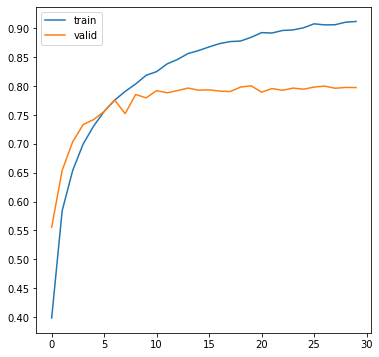

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

### model.predict()를 통해 이미지 분류 예측
* 4차원 이미지 배열을 입력해서 모델학습함. predict()시에도 4차원 이미지 배열을 입력해야함. 
* 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의  

In [ ]:
# 아래 코드는 오류 발생. Conv2D를 사용한 모델에 4차원 이미지 배열을 입력해서 모델을 학습했으므로 predict()시에도 테스트용 4차원 이미지 배열을 입력해야 함.  
preds = model.predict(test_images[0])

In [30]:
# 테스트용 4차원 이미지 배열을 입력해서 predict()수행. 
# predict()의 결과는 softmax 적용 결과임. 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의 
preds = model.predict(np.expand_dims(test_images[0], axis=0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (1, 10)
예측 결과: [[3.1255343e-08 8.1436706e-12 9.3059853e-09 9.9861526e-01 2.0759312e-09
  1.3443424e-03 4.0315619e-05 6.4847159e-09 1.2585373e-09 2.8316980e-09]]


In [31]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (32, 10)
예측 결과: [[3.12551052e-08 8.14351538e-12 9.30596755e-09 9.98615265e-01
  2.07590323e-09 1.34434563e-03 4.03157355e-05 6.48464127e-09
  1.25851085e-09 2.83164425e-09]
 [2.33903847e-05 8.07850342e-03 6.42520823e-15 1.85592730e-12
  1.99167194e-14 1.06156164e-16 1.38688262e-11 3.33159631e-17
  9.91895854e-01 2.19614890e-06]
 [3.60831642e-03 4.99136560e-03 1.43635965e-08 2.32472939e-05
  1.46687000e-08 3.57211911e-06 2.29770105e-08 6.56441102e-07
  9.91325259e-01 4.75366360e-05]
 [9.44688678e-01 1.50144988e-04 2.77663759e-07 1.46214541e-06
  4.57362412e-11 2.14076274e-11 3.55628416e-09 6.17707552e-11
  5.01898639e-02 4.96964948e-03]
 [2.97428166e-14 4.65330187e-14 1.41501482e-06 4.22116209e-05
  4.04114164e-02 2.24043437e-10 9.59544957e-01 7.20705818e-16
  1.21535350e-13 1.02398385e-11]
 [1.48864243e-09 1.52716346e-08 1.00547040e-05 1.72706583e-04
  2.36034775e-05 2.24436575e-04 9.99569118e-01 2.50767185e-09
  9.61021218e-09 2.90318116e-08]
 [2.58288765e-05 7.27577865e-

In [32]:
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3 8 8 0 6 6 1 4 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 2 4 0 9 6 6 5]


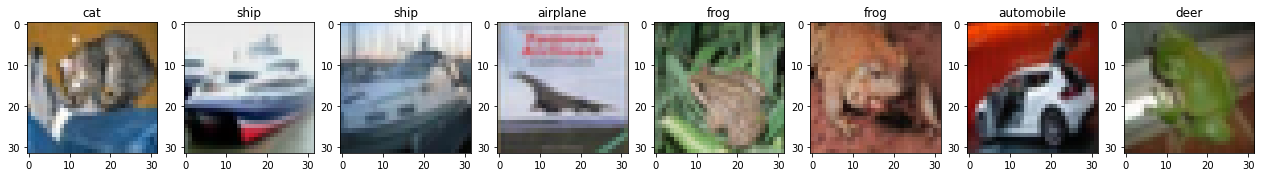

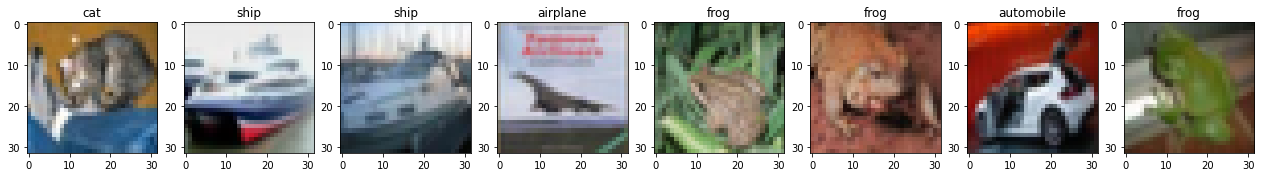

In [33]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)
# 맨 마지막 개구리 사진은 잘못 예측함.

### 평균이 1 이고 표준편차가 1인 표준 정규분포에서 난수 추출
* 표준 편차가 클 수록 개별 값의 크기가 일반적으로 커짐.

In [22]:
'''
np.random.normal은 정규 분포 난수 추출 함수. 
loc = 평균. scale 표준편차. 
'''
numbers = np.random.normal(loc=0.0,scale=1,size=[100, 100])
print(numbers)
print(numbers.mean())
print(numbers.std())
print(numbers.sum())

[[-0.79134662  0.61081488 -0.93951528 ... -0.14186054 -0.67495374
  -0.41781558]
 [ 1.55376047 -0.39962337 -0.92417037 ... -1.6883084  -0.41622784
  -0.7659294 ]
 [-1.00009804 -1.62043562  0.47792401 ...  0.15193977 -0.68512999
  -1.05262194]
 ...
 [ 0.07137775  0.81989503  0.95100821 ...  1.88087506 -0.55485833
  -0.77246405]
 [-0.0129323  -0.48038217  0.21301149 ...  0.0581059   1.1072542
  -0.95404291]
 [-0.91368134 -0.86449293 -1.19574181 ... -0.86275192  1.03403738
   0.92169772]]
-0.0060060122378457976
0.993054072686864
-60.060122378457976


### Xavier initialization - 정규분포(glorot_normal), 균일분포(glorot_uniform) 

In [23]:
# glorot_normal
fan_in = 20
fan_out = 15
scale_value = np.sqrt(2/(fan_in + fan_out))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.23904572186687872
[[-0.26834078 -0.19200976 -0.4625595  ... -0.17633404  0.1087722
  -0.13015605]
 [-0.0666797  -0.13674392 -0.24034975 ...  0.26562881 -0.09520079
  -0.42338598]
 [ 0.33774111 -0.54030651  0.58257019 ... -0.08741651 -0.07086151
   0.22712115]
 ...
 [-0.04911149 -0.08509569 -0.06283279 ... -0.09760333 -0.20288393
  -0.16079376]
 [-0.33081286 -0.18614516 -0.18007943 ... -0.01557452 -0.00539356
   0.18028554]
 [-0.21500192 -0.0655447  -0.11055094 ...  0.34918062 -0.17730887
  -0.234625  ]]
weights mean: -0.0034631343391761022 std: 0.23888550466122013 sum: -34.63134339176102


In [24]:
# glorot_uniform
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in + fan_out))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.5773502691896257
[[ 0.5007488  -0.10312397 -0.12846807 ...  0.01245553 -0.43891502
   0.02595959]
 [-0.40092326  0.53055092  0.25281774 ... -0.38125813  0.04226378
   0.3994392 ]
 [ 0.42857926  0.55439939  0.08518123 ... -0.57404893 -0.42922306
   0.21231899]
 ...
 [-0.16558902  0.04836107  0.24582188 ...  0.10228813  0.4936429
   0.16365587]
 [-0.36342562  0.33405697  0.5108214  ...  0.32396477 -0.0935206
   0.26186983]
 [ 0.24234825  0.37535156  0.48943769 ...  0.20912006 -0.56936936
   0.3422474 ]]
weights mean: 0.0006304656900300863 std: 0.33448664030294684 sum: 6.304656900300863


### He initialization - 정규분포(he_normal), 균일분포(he_uniform) 

In [25]:
fan_in = 10
fan_out = 8
scale_value = np.sqrt(2/(fan_in))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.4472135954999579
[[ 0.27928083  1.06853296  0.68812044 ...  0.00519863  0.37338649
   0.03111017]
 [-0.14099772 -0.24176124  0.03351721 ... -0.82221269 -0.16064244
   0.02617827]
 [ 0.01033604  0.58392456  0.75293029 ...  0.01854759  0.27169822
  -0.36184849]
 ...
 [ 0.27150067  0.77272358  0.60336294 ...  0.48542045 -0.16578508
  -0.20149342]
 [-0.76702209  0.3940018  -0.10473986 ... -0.83118823  0.18751527
  -0.04181324]
 [-0.22867626 -0.02262392  0.07937445 ...  0.36041227 -0.24813413
  -0.48821832]]
weights mean: 0.003673156686130439 std: 0.451475115136126 sum: 36.73156686130439


In [34]:
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.7745966692414834
[[ 0.3042276  -0.27636178  0.38016506 ...  0.10054036  0.67222733
   0.48180121]
 [ 0.01891217 -0.57570656 -0.75387505 ...  0.69477696  0.25516763
  -0.04905514]
 [ 0.32137902  0.36003516 -0.16926827 ...  0.31582242 -0.74566096
   0.08241178]
 ...
 [-0.4457891  -0.09624984 -0.61091222 ...  0.07591229 -0.64667383
  -0.31843139]
 [ 0.08521069 -0.63917029  0.01038392 ... -0.00580054  0.3981015
  -0.2754741 ]
 [-0.5845088  -0.05387058 -0.37485089 ... -0.59562284 -0.46328221
   0.68166095]]
weights mean: -0.007080791021952641 std: 0.4495631021044442 sum: -70.8079102195264


### weight 초기화를 He Normal로 변경 후 성능 검증
* Keras Conv2D의 기본 weight 초기화는 glorot_uniform임. 이를 he_normal로 변경 후 동일 모델로 성능 테스트 
* label은 원-핫 인코딩을 적용 

In [35]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    labels = labels.squeeze()
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
print(train_images.shape, train_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [36]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                           

In [37]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15 )

Epoch 1/30
665/665 [==============================] - 8s 10ms/step - loss: 1.5850 - accuracy: 0.4153 - val_loss: 1.6192 - val_accuracy: 0.4476
Epoch 2/30
665/665 [==============================] - 5s 7ms/step - loss: 1.1511 - accuracy: 0.5904 - val_loss: 0.9867 - val_accuracy: 0.6572
Epoch 3/30
665/665 [==============================] - 5s 8ms/step - loss: 0.9680 - accuracy: 0.6588 - val_loss: 0.9220 - val_accuracy: 0.6783
Epoch 4/30
665/665 [==============================] - 6s 8ms/step - loss: 0.8424 - accuracy: 0.7027 - val_loss: 0.8370 - val_accuracy: 0.7115
Epoch 5/30
665/665 [==============================] - 5s 7ms/step - loss: 0.7511 - accuracy: 0.7343 - val_loss: 0.7396 - val_accuracy: 0.7447
Epoch 6/30
665/665 [==============================] - 5s 7ms/step - loss: 0.6850 - accuracy: 0.7584 - val_loss: 0.7796 - val_accuracy: 0.7317
Epoch 7/30
665/665 [==============================] - 4s 7ms/step - loss: 0.6277 - accuracy: 0.7783 - val_loss: 0.7704 - val_accuracy: 0.7369
Epoch

313/313 [==============================] - 1s 3ms/step - loss: 0.7857 - accuracy: 0.7779


[0.7857272624969482, 0.777899980545044]

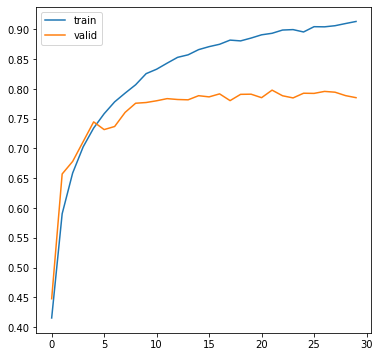

In [38]:
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_oh_labels)

### Batch Normalization을 모델에 적용 후 성능 검증
- Batch Normalization 하기 전에 `kernel_initializer='he_normal'`하면 성능에 큰 차이가 없다.

In [39]:
import tensorflow as tf
import numpy as np
import random as python_random

np.random.seed(2021)
python_random.seed(2021)
tf.random.set_seed(2021)

In [40]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
# BatchNormalization 이후에 activation을 해야한다! 그러므로 BatchNormalization할 때는
# x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor) 이렇게 쓰면 안된다. 

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [41]:
# label값이 원-핫 인코딩이 아니므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 8s 10ms/step - loss: 1.5712 - accuracy: 0.4303 - val_loss: 1.3633 - val_accuracy: 0.5229
Epoch 2/30
665/665 [==============================] - 6s 9ms/step - loss: 1.1060 - accuracy: 0.6009 - val_loss: 1.5711 - val_accuracy: 0.5133
Epoch 3/30
665/665 [==============================] - 7s 10ms/step - loss: 0.9123 - accuracy: 0.6822 - val_loss: 1.1449 - val_accuracy: 0.6228
Epoch 4/30
665/665 [==============================] - 6s 8ms/step - loss: 0.8004 - accuracy: 0.7228 - val_loss: 0.8534 - val_accuracy: 0.7036
Epoch 5/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7161 - accuracy: 0.7494 - val_loss: 0.9655 - val_accuracy: 0.6780
Epoch 6/30
665/665 [==============================] - 6s 8ms/step - loss: 0.6527 - accuracy: 0.7743 - val_loss: 0.8448 - val_accuracy: 0.7291
Epoch 7/30
665/665 [==============================] - 5s 8ms/step - loss: 0.5944 - accuracy: 0.7935 - val_loss: 0.9974 - val_accuracy: 0.6713
Epoc

In [42]:
model.evaluate(test_images, test_oh_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.7446 - accuracy: 0.8176


[0.7446005344390869, 0.8176000118255615]